In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 

# Project:
## Loan Factors Prediction Analysis 

In [64]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\synthetic_loan_data.csv")

# Data Info

In [65]:
df.shape

(9000, 14)

In [66]:
df.head()

,CustomerID,Name,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Michelle Prince,56,Male,Divorced,Other,Employed,97622,46413,Personal,500,2,4,Yes
1,23b8c1e9-3924-46de-beb1-3b9046685257,Diana Mullins,69,Male,Married,Bachelor,Employed,96925,24065,Home,532,2,0,Yes
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Brittany Ballard,46,Female,Single,High School,Self-employed,167927,46676,Personal,795,2,6,Yes
3,972a8469-1641-4f82-8b9d-2434e465e150,Matthew Freeman,32,Female,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,No
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Amy Baker,60,Female,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,No


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            9000 non-null   object
 1   Name                  9000 non-null   object
 2   Age                   9000 non-null   int64 
 3   Gender                9000 non-null   object
 4   MaritalStatus         9000 non-null   object
 5   EducationLevel        9000 non-null   object
 6   EmploymentStatus      9000 non-null   object
 7   AnnualIncome          9000 non-null   int64 
 8   LoanAmountRequested   9000 non-null   int64 
 9   PurposeOfLoan         9000 non-null   object
 10  CreditScore           9000 non-null   int64 
 11  ExistingLoansCount    9000 non-null   int64 
 12  LatePaymentsLastYear  9000 non-null   int64 
 13  LoanApproved          9000 non-null   object
dtypes: int64(6), object(8)
memory usage: 984.5+ KB


# Data Handling & Cleaning

In [68]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [69]:
df.drop(columns=['CustomerID', 'Name'],inplace=True)

# EDA , Visualization & Machine Learning

In [70]:
df.head()

,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,56,Male,Divorced,Other,Employed,97622,46413,Personal,500,2,4,Yes
1,69,Male,Married,Bachelor,Employed,96925,24065,Home,532,2,0,Yes
2,46,Female,Single,High School,Self-employed,167927,46676,Personal,795,2,6,Yes
3,32,Female,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,No
4,60,Female,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,No


## Histogram Distribution

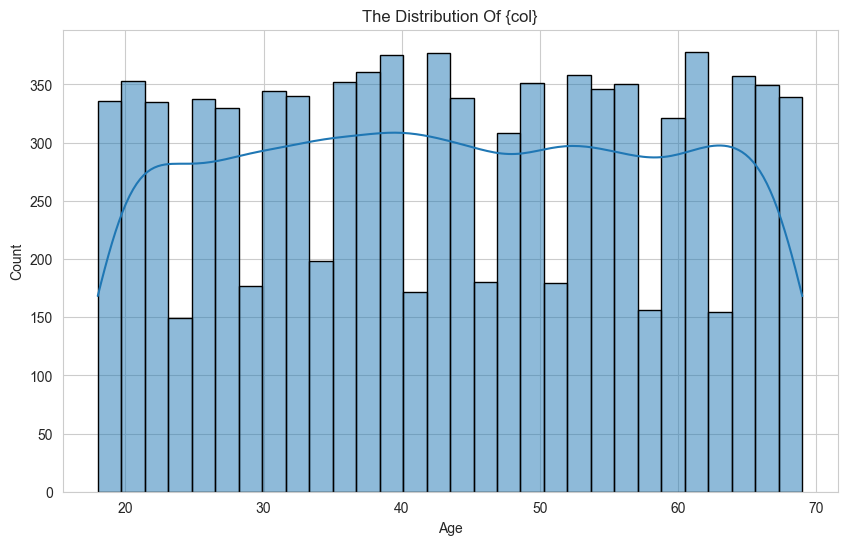

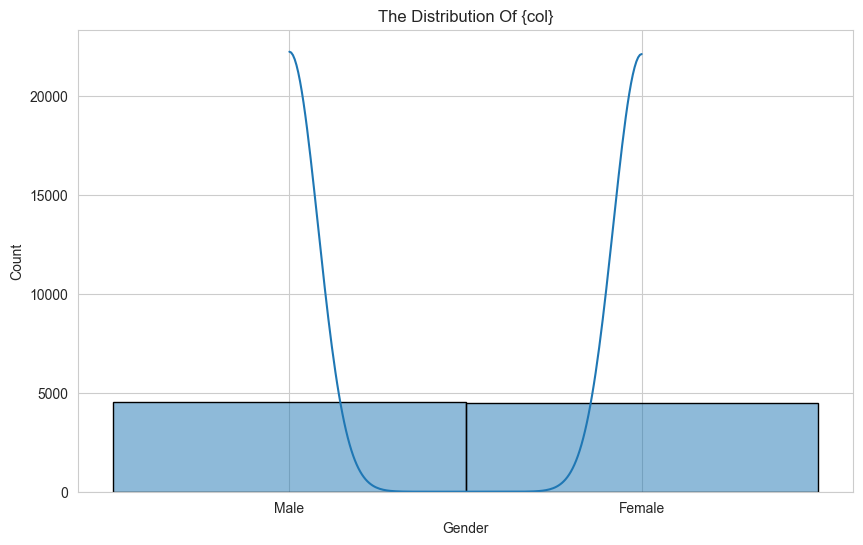

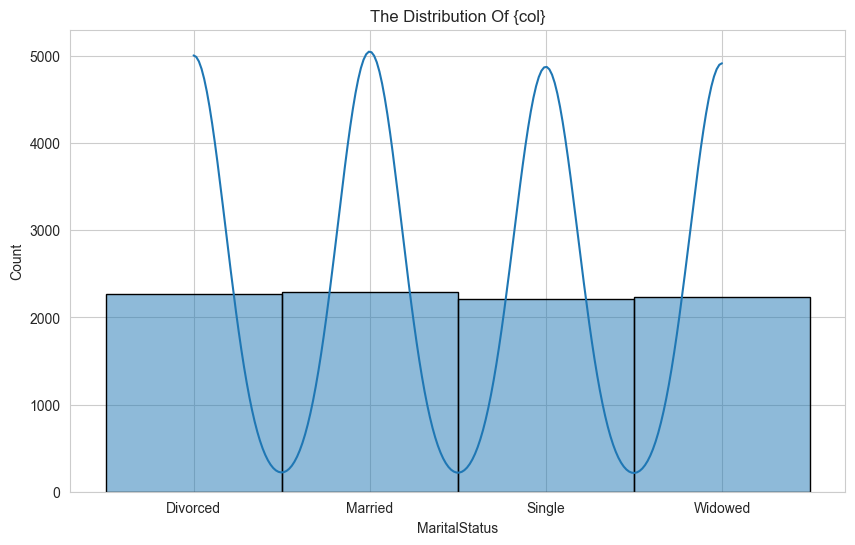

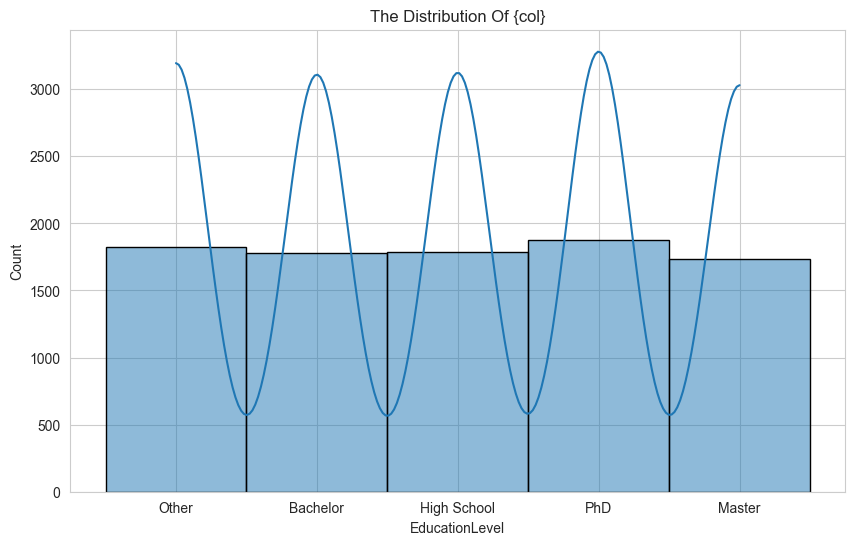

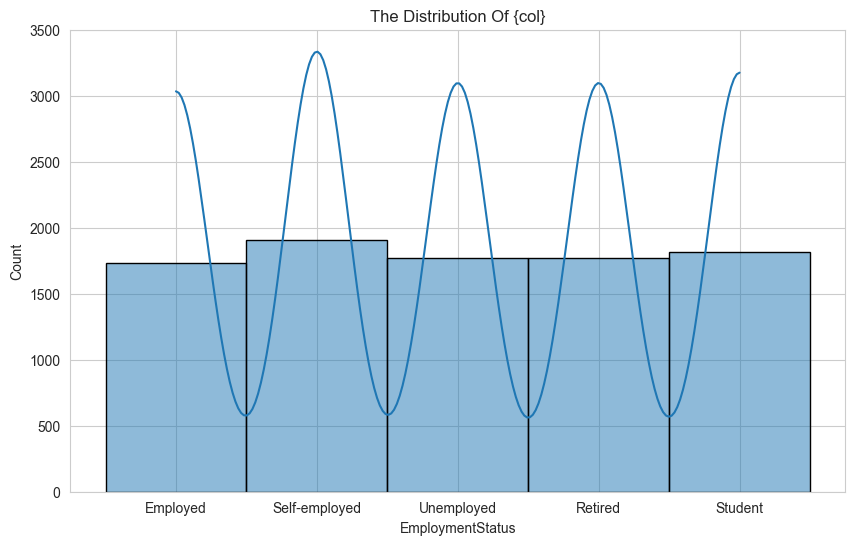

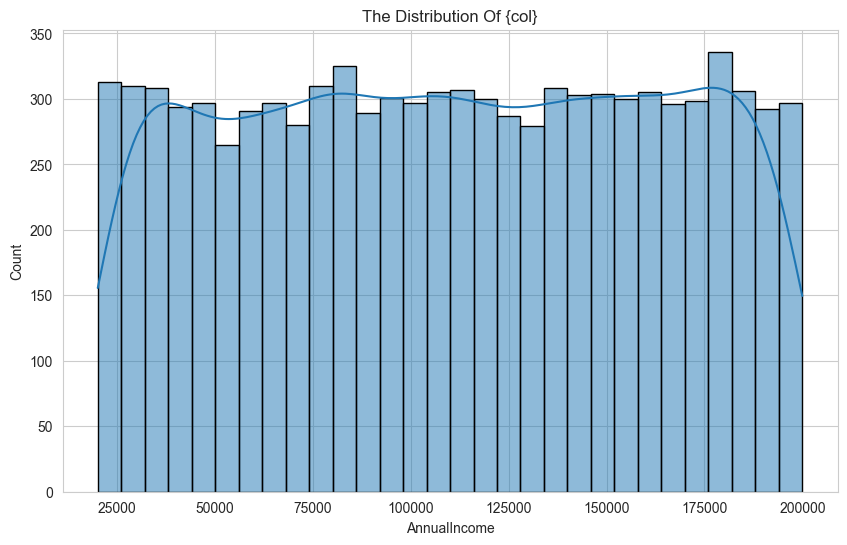

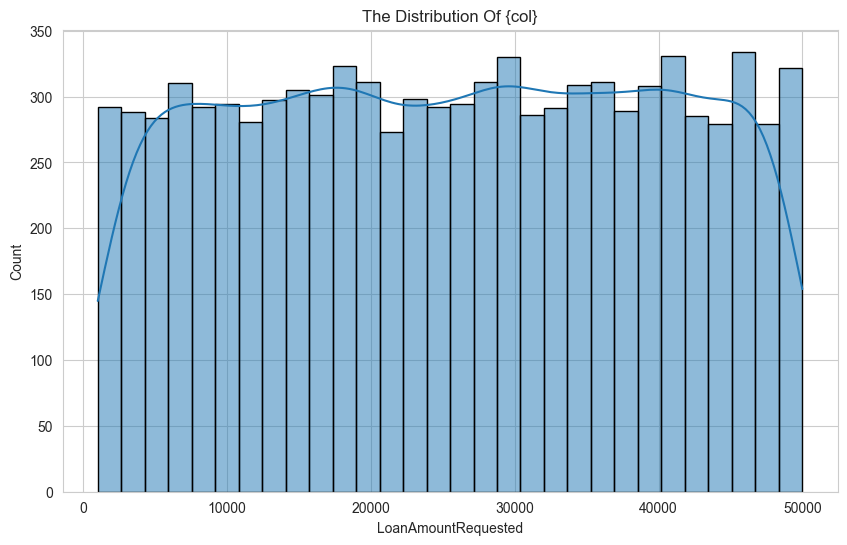

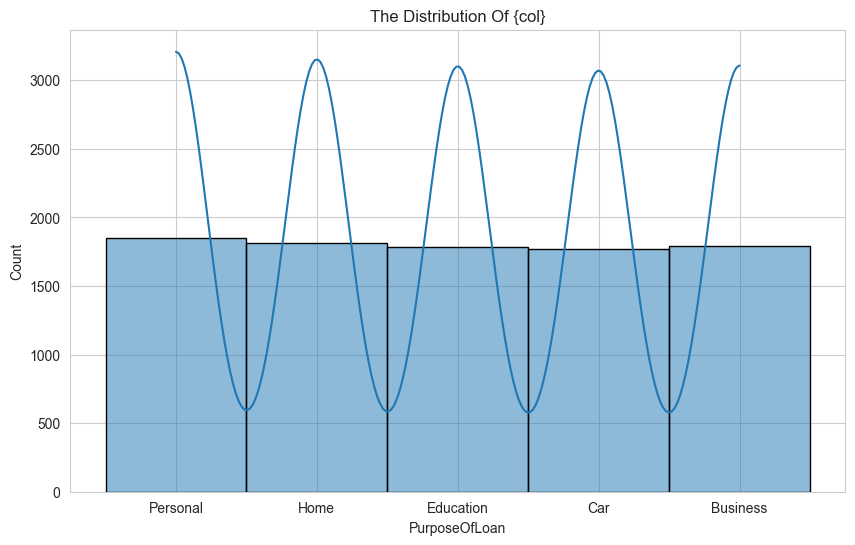

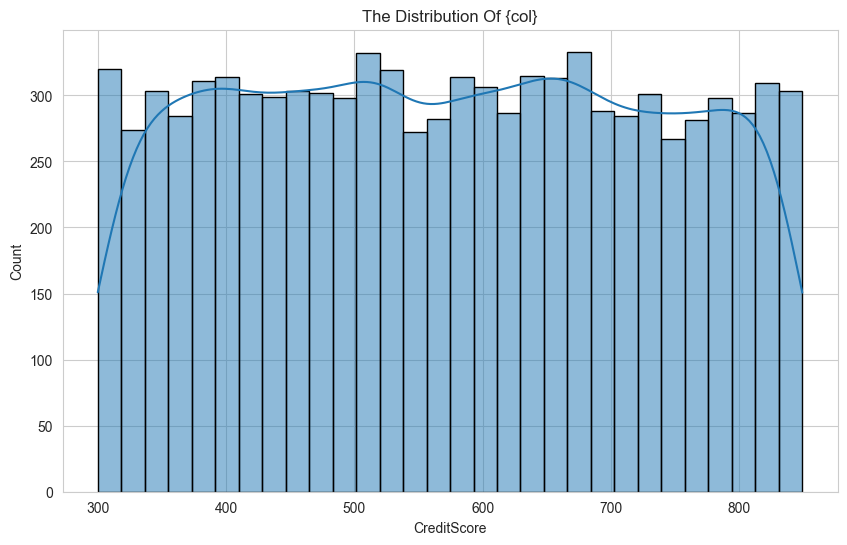

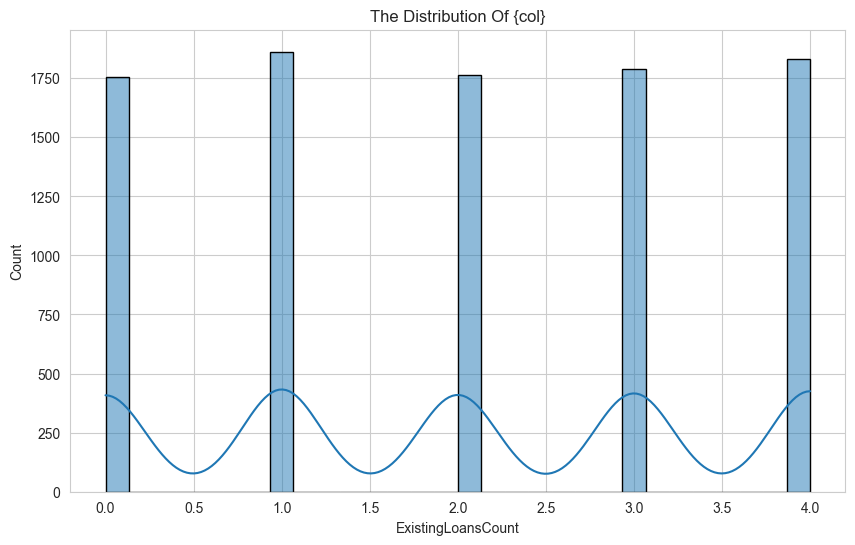

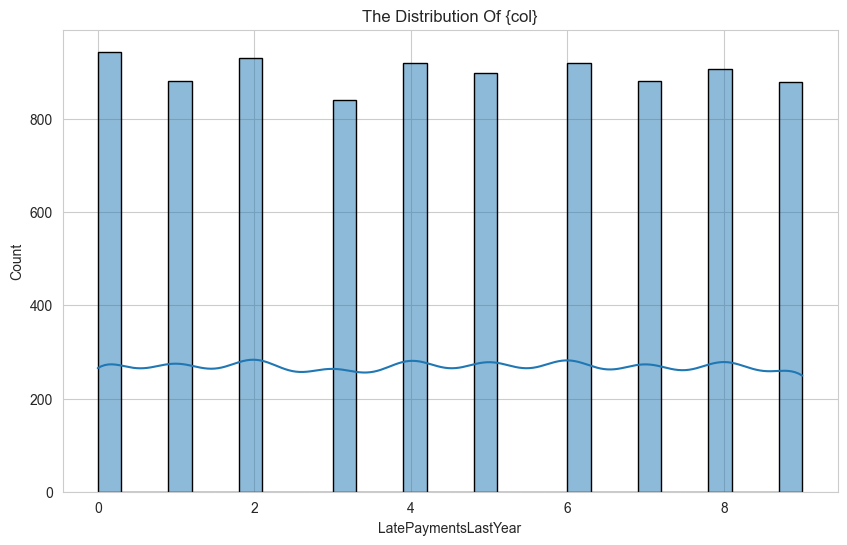

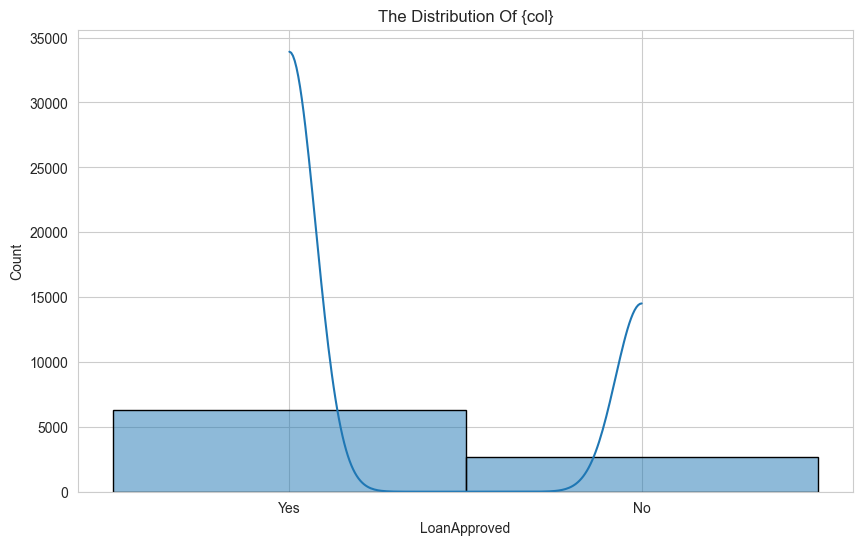

In [71]:
for col in df:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df,bins=30,x=col,kde=True,edgecolor="black")
    plt.title("The Distribution Of {col}")
    plt.show()

## Average Credit Score Classfication Based On Gender & Employment Status

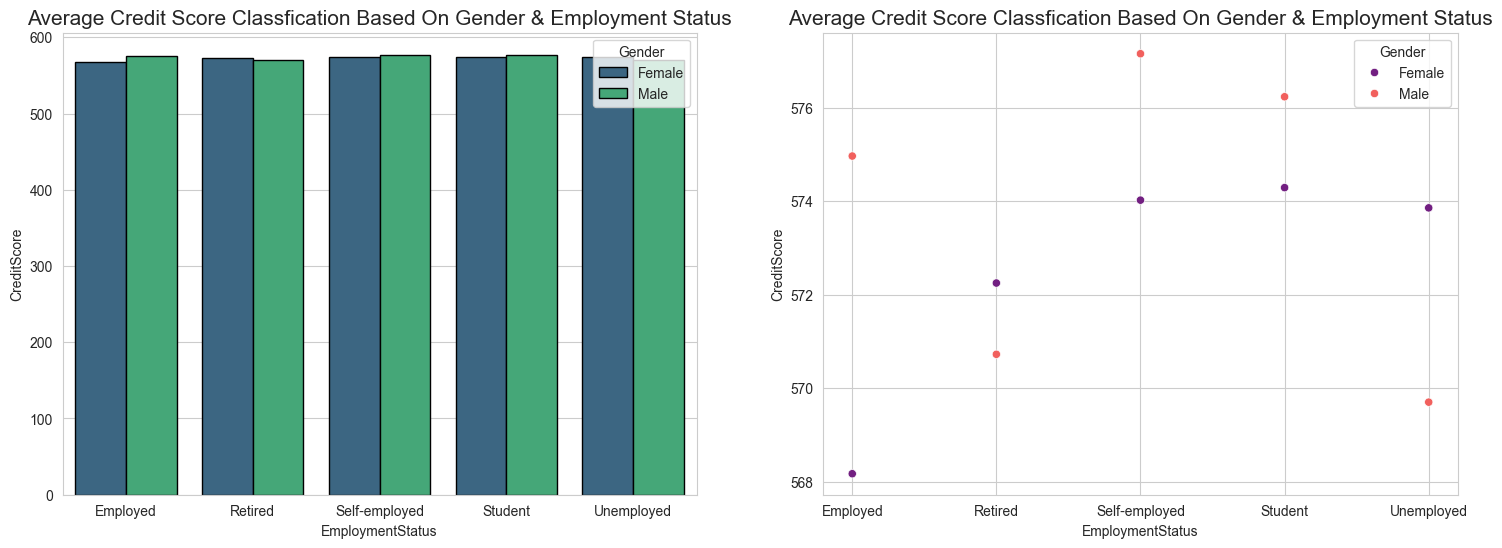

In [72]:
classifi_cr=df.groupby(["Gender","EmploymentStatus"])["CreditScore"].mean().reset_index()
classifi_cr
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.set_style("whitegrid")
sns.barplot(data=classifi_cr,x="EmploymentStatus",y="CreditScore",hue="Gender",palette="viridis",edgecolor="black")
plt.title("Average Credit Score Classfication Based On Gender & Employment Status",size=15)
plt.subplot(1,2,2)
sns.scatterplot(data=classifi_cr,x="EmploymentStatus",y="CreditScore",hue="Gender",palette="magma")
plt.title("Average Credit Score Classfication Based On Gender & Employment Status",size=15)
plt.show()

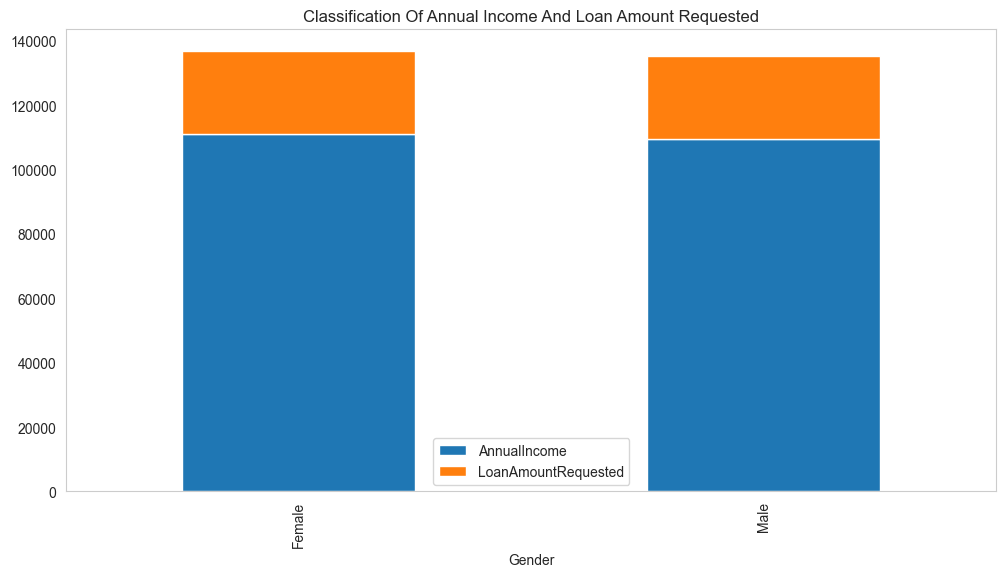

In [73]:
classifi_inc=df.groupby("Gender")[["AnnualIncome","LoanAmountRequested"]].mean().reset_index()
classifi_inc.plot(kind="bar",stacked=True,x="Gender",title="Classification Of Annual Income And Loan Amount Requested",figsize=(12,6))
plt.grid()


## Classification Of Marital,Educational & Employment Status & The Purpose Of Loan

<Axes: title={'center': 'Distribution of Purpose Of Loan'}, ylabel='count'>

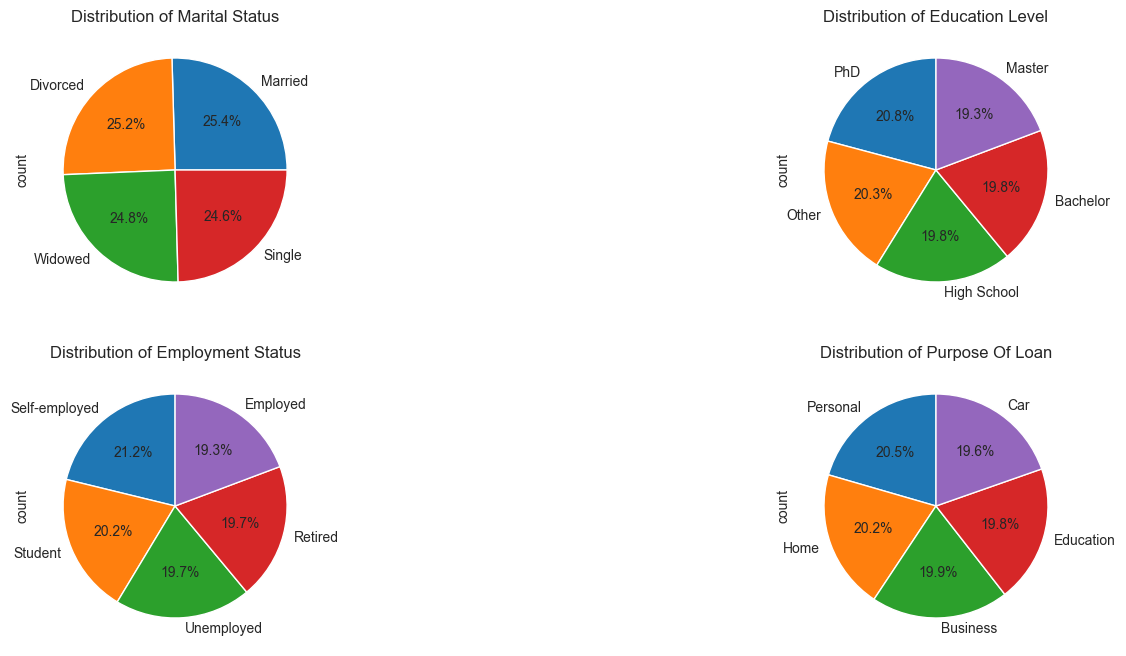

In [74]:
plt.figure(figsize=(18, 8))
plt.subplot(2,2,1)
df["MaritalStatus"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Distribution of Marital Status"
)
plt.subplot(2,2,2)
df["EducationLevel"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Distribution of Education Level",
    startangle=90
)
plt.subplot(2,2,3)
df["EmploymentStatus"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Distribution of Employment Status",
    startangle=90)
plt.subplot(2,2,4)
df["PurposeOfLoan"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Distribution of Purpose Of Loan",
    startangle=90)

In [75]:
classifi_gen=df.groupby(["Gender","MaritalStatus","EducationLevel","EmploymentStatus"]).size().reset_index(name="Count")
classifi_gen

,Gender,MaritalStatus,EducationLevel,EmploymentStatus,Count
0,Female,Divorced,Bachelor,Employed,32
1,Female,Divorced,Bachelor,Retired,48
2,Female,Divorced,Bachelor,Self-employed,43
3,Female,Divorced,Bachelor,Student,55
4,Female,Divorced,Bachelor,Unemployed,42
...,...,...,...,...,...
195,Male,Widowed,PhD,Employed,41
196,Male,Widowed,PhD,Retired,44
197,Male,Widowed,PhD,Self-employed,52
198,Male,Widowed,PhD,Student,44


In [76]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

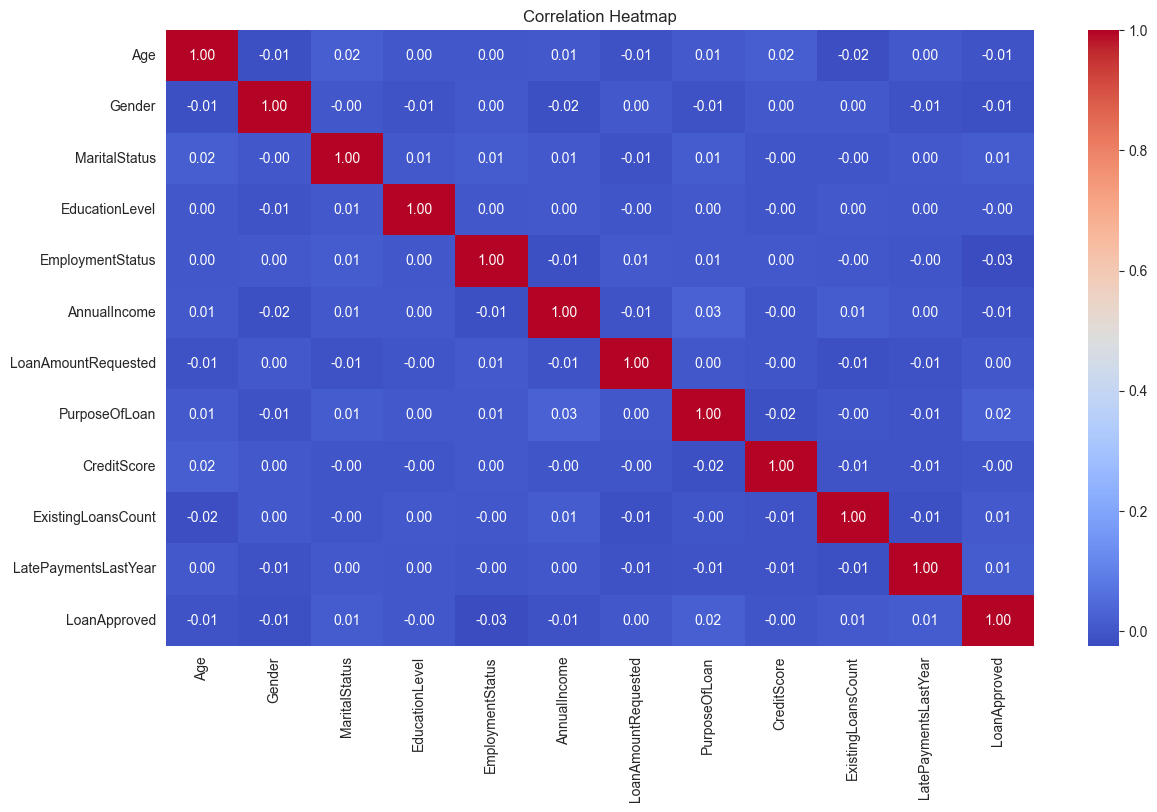

Random Forest Report:
               precision    recall  f1-score   support

           0       0.30      0.47      0.37       833
           1       0.68      0.51      0.58      1867

    accuracy                           0.50      2700
   macro avg       0.49      0.49      0.48      2700
weighted avg       0.57      0.50      0.52      2700

ROC AUC (RF): 0.4956231019456524
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.30      0.47      0.37       833
           1       0.68      0.51      0.59      1867

    accuracy                           0.50      2700
   macro avg       0.49      0.49      0.48      2700
weighted avg       0.57      0.50      0.52      2700

ROC AUC (LR): 0.4894056176300194
SVM Report:
               precision    recall  f1-score   support

           0       0.30      0.47      0.37       833
           1       0.69      0.52      0.59      1867

    accuracy                           0.50      27

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning:

[12:23:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Voting Classifier Report:
               precision    recall  f1-score   support

           0       0.30      0.47      0.37       833
           1       0.68      0.50      0.58      1867

    accuracy                           0.49      2700
   macro avg       0.49      0.49      0.47      2700
weighted avg       0.56      0.49      0.51      2700

ROC AUC (Voting): 0.49325139804180906


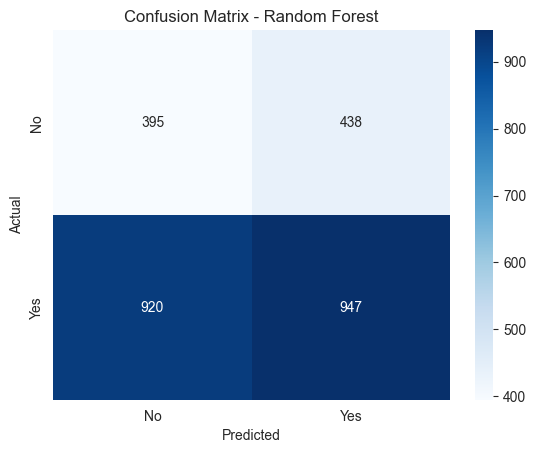

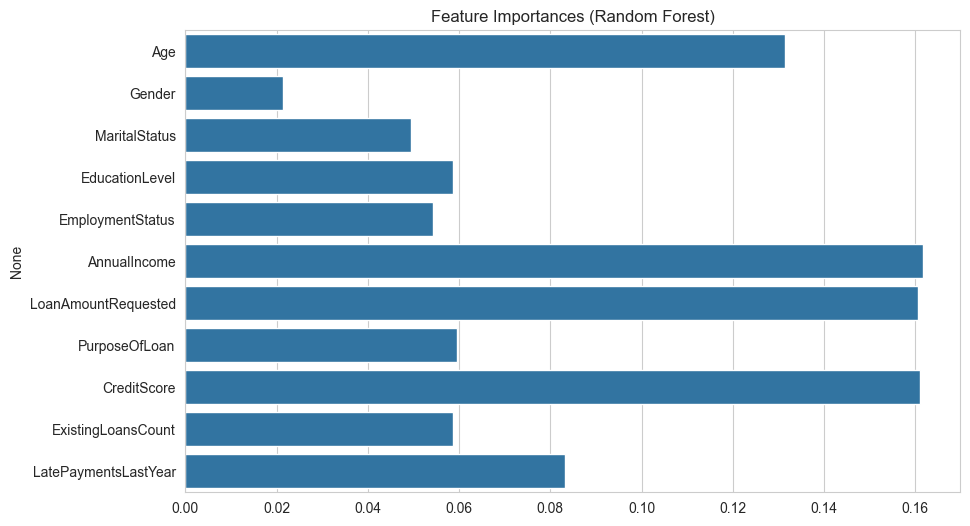

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import plotly.express as px
from sklearn.utils import resample

# Correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# PCA visualization
features = df.drop("LoanApproved", axis=1)
features_scaled = StandardScaler().fit_transform(features)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['LoanApproved'] = df['LoanApproved']
fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color=df_pca['LoanApproved'].map({0: "No", 1: "Yes"}),
    title="PCA: Loan Approval Clusters"
)
fig.show()

# Prepare data
X = df.drop("LoanApproved", axis=1)
y = df["LoanApproved"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Downsample majority class
df_train = X_train.copy()
df_train['LoanApproved'] = y_train
df_majority = df_train[df_train.LoanApproved == 1]
df_minority = df_train[df_train.LoanApproved == 0]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_balanced = pd.concat([df_minority, df_majority_downsampled])
X_train_bal = df_balanced.drop("LoanApproved", axis=1)
y_train_bal = df_balanced["LoanApproved"]

# Scale
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
clf_rf.fit(X_train_bal_scaled, y_train_bal)
y_pred_rf = clf_rf.predict(X_test_scaled)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC (RF):", roc_auc_score(y_test, clf_rf.predict_proba(X_test_scaled)[:, 1]))

# Logistic Regression
clf_lr = LogisticRegression(max_iter=1000, class_weight='balanced')
clf_lr.fit(X_train_bal_scaled, y_train_bal)
y_pred_lr = clf_lr.predict(X_test_scaled)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC (LR):", roc_auc_score(y_test, clf_lr.predict_proba(X_test_scaled)[:, 1]))

# SVM
clf_svc = SVC(kernel='rbf', probability=True, class_weight='balanced')
clf_svc.fit(X_train_bal_scaled, y_train_bal)
y_pred_svc = clf_svc.predict(X_test_scaled)
print("SVM Report:\n", classification_report(y_test, y_pred_svc))
print("ROC AUC (SVC):", roc_auc_score(y_test, clf_svc.predict_proba(X_test_scaled)[:, 1]))

# XGBoost
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
clf_xgb.fit(X_train_bal_scaled, y_train_bal)
y_pred_xgb = clf_xgb.predict(X_test_scaled)
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC (XGB):", roc_auc_score(y_test, clf_xgb.predict_proba(X_test_scaled)[:, 1]))

# Voting Ensemble
ensemble = VotingClassifier(estimators=[
    ('lr', clf_lr),
    ('rf', clf_rf),
    ('svc', clf_svc)
], voting='soft')
ensemble.fit(X_train_bal_scaled, y_train_bal)
y_pred_ens = ensemble.predict(X_test_scaled)
print("Voting Classifier Report:\n", classification_report(y_test, y_pred_ens))
print("ROC AUC (Voting):", roc_auc_score(y_test, ensemble.predict_proba(X_test_scaled)[:, 1]))

# Confusion Matrix for best model
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = clf_rf.feature_importances_
feat_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances (Random Forest)")
plt.show()
